# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [16]:
# Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

#data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read files
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
output = pd.merge(mouse_metadata, study_results, on="Mouse ID")
output.head()

# Display the data table for preview


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [17]:
# Checking the number of mice.
output["Mouse ID"].nunique()


249

In [18]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
Mouse_Multiple = output[output.duplicated(["Mouse ID","Timepoint"])]
Mouse_Multiple


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [19]:
# Optional: Get all the data for the duplicate mouse ID. 
output = output[output["Mouse ID"]!="g989"]
output

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [20]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
output = output[output["Mouse ID"]!="g989"]
output

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [21]:
# Checking the number of mice in the clean DataFrame.
len(output['Mouse ID'].unique())

248

## Summary Statistics

In [23]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

Regimen_type = output.groupby("Drug Regimen")
Tumor_mean = Regimen_type["Tumor Volume (mm3)"].mean()
Tumor_median = Regimen_type["Tumor Volume (mm3)"].median()
Tumor_var = Regimen_type["Tumor Volume (mm3)"].var()
Tumor_stdev = Regimen_type["Tumor Volume (mm3)"].std()
Tumor_SEM = Regimen_type["Tumor Volume (mm3)"].sem()


# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

Regimen_summary = pd.DataFrame([Tumor_mean,Tumor_median,Tumor_var,Tumor_stdev,Tumor_SEM]).T
Regimen_summary.columns = ["Tumor Volume Mean",
                      "Tumor Volume Median",
                      "Tumor Volume Variance",
                      "Tumor Volume Std. Dev.",
                      "Tumor Volume Std. Err."]
Regimen_summary


,Tumor Volume Mean,Tumor Volume Median,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [24]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
Stats_summary = {"Tumor Volume (mm3)": ["mean", "median", "var", "std", "sem"]}
output.groupby("Drug Regimen").agg(Stats_summary)

# Using the aggregation method, produce the same summary statistics in a single line


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

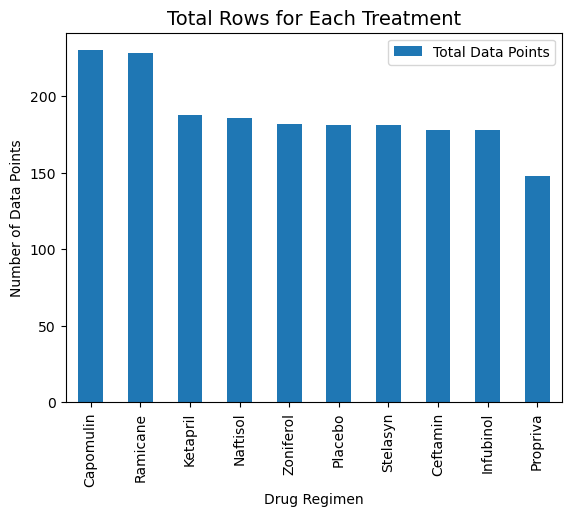

In [25]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
Total_Rows = Regimen_type["Drug Regimen"].count()
Total_Rows_df = pd.DataFrame(Total_Rows)
Total_Rows_df.columns = ["Total Data Points"]
Total_Rows_plot = Total_Rows_df.sort_values("Total Data Points", ascending = False).plot(kind="bar")
Total_Rows_plot.set_xlabel("Drug Regimen")
Total_Rows_plot.set_ylabel("Number of Data Points")
plt.title("Total Rows for Each Treatment", fontsize = 14)
plt.show()

Text(0, 0.5, 'Number of Data Points')

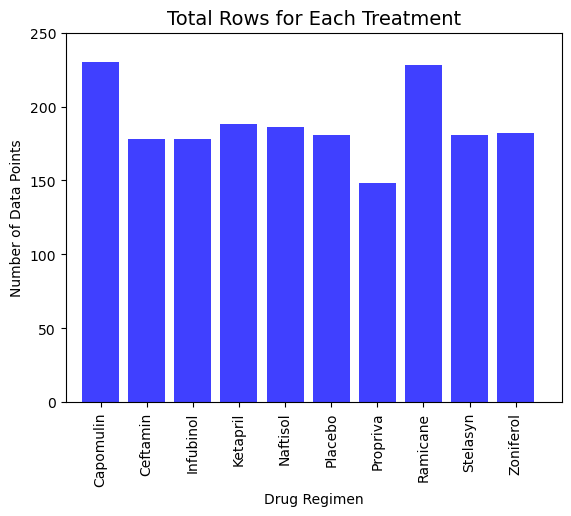

In [26]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis = np.arange(len(Total_Rows_df))
tick_locations = [value for value in x_axis]
Total_Rows = Total_Rows_df.sort_values("Total Data Points", ascending = False)
plt.bar(x_axis, Total_Rows_df["Total Data Points"], color='b', alpha = 0.75, align="center")
plt.xticks(tick_locations, Total_Rows_df.index, rotation="vertical")
plt.xlim(-0.75, len(x_axis))
plt.ylim(0, 250)
plt.title("Total Rows for Each Treatment", fontsize = 14)
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")

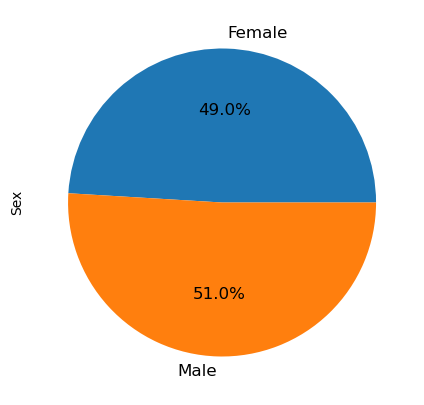

In [27]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
Male_Female_df = output.groupby("Sex")
Male_Female_count = Male_Female_df["Sex"].count()
Male_Female_plot = Male_Female_count.plot(kind = "pie", y = "Sex", autopct="%1.1f%%", fontsize=12, figsize=(5, 5))


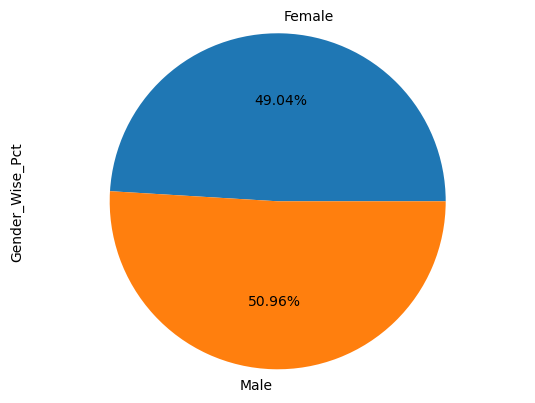

In [28]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
label = ["Female", "Male"]
count = [Male_Female_count["Female"],Male_Female_count["Male"]]
plt.pie(count, labels = label, autopct="%.2f%%")
plt.ylabel("Gender_Wise_Pct")
plt.axis("equal")
plt.show()

## Quartiles, Outliers and Boxplots

In [29]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
Final_tumor_volume = output.groupby("Mouse ID")
Final_tumor_volume = Final_tumor_volume["Timepoint"].max()
Final_tumor_df = pd.DataFrame(Final_tumor_volume)

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
Final_tumor_df = pd.merge(Final_tumor_df, output, on = ["Mouse ID","Timepoint"])
Final_tumor_df.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1


In [36]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)
Drugs = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
tumor_cap = []
tumor_ram = []
tumor_inf = []
tumor_cef = []
for i in range(len(Final_tumor_df)-1):
    if Final_tumor_df.loc[i, "Drug Regimen"] == "Capomulin":
        tumor_cap.append(Final_tumor_df.loc[i, "Tumor Volume (mm3)"])
    if Final_tumor_df.loc[i, "Drug Regimen"] == "Ramicane":
        tumor_ram.append(Final_tumor_df.loc[i, "Tumor Volume (mm3)"])
    if Final_tumor_df.loc[i, "Drug Regimen"] == "Infubinol":
        tumor_inf.append(Final_tumor_df.loc[i, "Tumor Volume (mm3)"])
    if Final_tumor_df.loc[i, "Drug Regimen"] == "Ceftamin":
        tumor_cef.append(Final_tumor_df.loc[i, "Tumor Volume (mm3)"])
        
Tumor_vol = [tumor_cap, tumor_ram, tumor_inf, tumor_cef]


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

outlier_calc = []
for i in range(len(Tumor_vol)):
    quartiles = pd.Series(Tumor_vol[i]).quantile([.25,.5,.75])
    lower_Q = quartiles[0.25]
    upper_Q = quartiles[0.75]
    IQR = upper_Q-lower_Q
    print(f"\n{Drugs[i]}:")
    print(f"Lower quartile of tumor volume: {lower_Q}.")
    print(f"Upper quartile of tumor volume: {upper_Q}.")
    print(f"Interquartile range of tumor volume: {IQR}.")
    print(f"Median of tumor volume: {quartiles[0.5]}.")
    lower_bound = lower_Q - (1.5*IQR)
    upper_bound = upper_Q + (1.5*IQR)
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")
    
    # Locating rows with contain mice on each drug 
    # Determining outliers upper and lower
    
    for x in range(len(Tumor_vol[i])):
        if (Tumor_vol[i][x] < lower_bound) or (Tumor_vol[i][x] > upper_bound):
            outlier = Tumor_vol[i][x]
            outlier_calc.append(outlier)
            print(f"The outliers are {outlier_calc}.")





Capomulin:
Lower quartile of tumor volume: 32.37735684.
Upper quartile of tumor volume: 40.1592203.
Interquartile range of tumor volume: 7.781863460000004.
Median of tumor volume: 38.1251644.
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.

Ramicane:
Lower quartile of tumor volume: 31.56046955.
Upper quartile of tumor volume: 40.65900627.
Interquartile range of tumor volume: 9.098536719999998.
Median of tumor volume: 36.56165229.
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.

Infubinol:
Lower quartile of tumor volume: 54.04860769.
Upper quartile of tumor volume: 65.52574285.
Interquartile range of tumor volume: 11.477135160000003.
Median of tumor volume: 60.16518046.
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.
The outliers are [36.3213458].

Ceftamin:
Lower quartile of tumor volume: 48.72207785.
Upper quartile of tumor volume: 64.299830

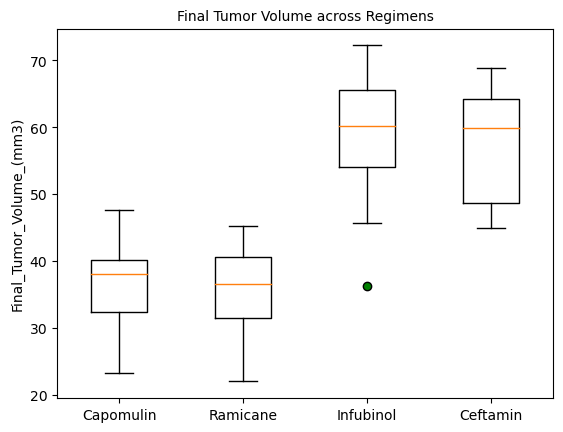

In [46]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
import matplotlib.pyplot as plt
tumor_vol_treatment_grp = dict(markerfacecolor = "g", marker = "o")
fig1, ax1 = plt.subplots()
ax1.set_ylabel("Final_Tumor_Volume_(mm3)")
ax1.boxplot(Tumor_vol, flierprops = tumor_vol_treatment_grp)
ax1.set_title("Final Tumor Volume across Regimens", fontsize = 10)
ax1.set_xticklabels(Drugs)
plt.show()

## Line and Scatter Plots

In [57]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
Final_tumor_df.loc[Final_tumor_df["Drug Regimen"] == "Capomulin"].head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
19,b128,45,Capomulin,Female,9,22,38.982878,2
24,b742,45,Capomulin,Male,7,21,38.939633,0
61,f966,20,Capomulin,Male,16,17,30.485985,0
64,g288,45,Capomulin,Male,3,19,37.074024,1
66,g316,45,Capomulin,Female,22,22,40.159220,2


In [59]:
# for Mouse_ID b742
ID_b742 = output.loc[output["Mouse ID"]=="g316"]
ID_b742

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
351,g316,Capomulin,Female,22,22,0,45.000000,0
352,g316,Capomulin,Female,22,22,5,44.022752,0
353,g316,Capomulin,Female,22,22,10,44.502042,0
354,g316,Capomulin,Female,22,22,15,45.216743,0
355,g316,Capomulin,Female,22,22,20,45.933322,1
356,g316,Capomulin,Female,22,22,25,46.809225,1
357,g316,Capomulin,Female,22,22,30,44.221480,2
358,g316,Capomulin,Female,22,22,35,44.702833,2
359,g316,Capomulin,Female,22,22,40,45.565821,2
360,g316,Capomulin,Female,22,22,45,40.159220,2


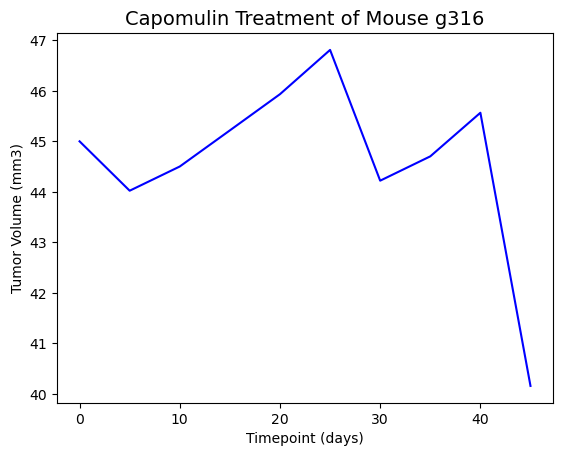

In [60]:
plt.plot(ID_b742["Timepoint"],ID_b742["Tumor Volume (mm3)"], color = "blue")
plt.title("Capomulin Treatment of Mouse g316", fontsize = 14)
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

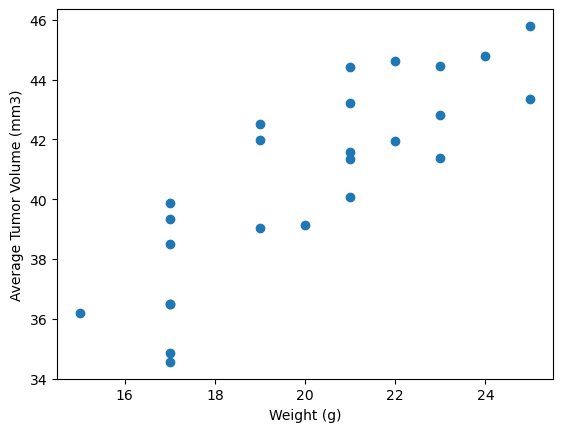

In [50]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin = output.loc[output["Drug Regimen"]=="Capomulin"].groupby("Mouse ID")
avg_capomulin = capomulin["Tumor Volume (mm3)"].mean()
weight = capomulin["Weight (g)"].unique()
plt.scatter(weight, avg_capomulin)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

Correlation - mouse weight and average tumor volume: 0.84.


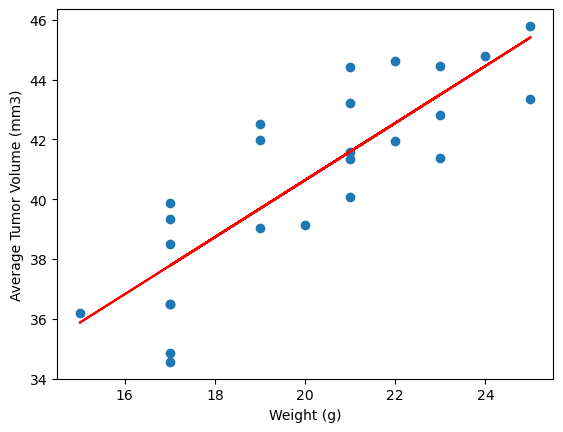

In [53]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

mouse_weight = mouse_weight.astype(float)
correlation = st.pearsonr(mouse_weight, avg_tumor_capomulin)
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(mouse_weight, avg_tumor_capomulin)
regress_values = mouse_weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(mouse_weight, avg_tumor_capomulin)
plt.plot(mouse_weight,regress_values,"r-")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
print(f"Correlation - mouse weight and average tumor volume: {round(correlation[0], 2)}.")
plt.show()